# The code prepares tools for building and training a CNN for image classification.# 

In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# This code # Defines paths for "Normal" and "Stroke" image datasets.

In [3]:
# Define dataset paths
normal_path = '/kaggle/input/stroke/Brain_Data_Organised/Normal'
stroke_path = '/kaggle/input/stroke/Brain_Data_Organised/Stroke'

# Resizes and loads labeled "Normal" (0) and "Stroke" (1) images for training.

In [4]:
# Define image size for resizing
IMG_SIZE = 224

def load_data(folder_path, label, img_size=IMG_SIZE):
    data = []
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        # Read and resize image
        image = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if image is not None:
            image = cv2.resize(image, (img_size, img_size))
            data.append((image, label))
    return data

# Load normal and stroke images
normal_data = load_data(normal_path, label=0)
stroke_data = load_data(stroke_path, label=1)

# Combines, shuffles, and extracts normalized features (X) and labels (y) for training.

In [5]:
# Combine datasets
dataset = normal_data + stroke_data

# Shuffle data
np.random.shuffle(dataset)

# Extract features and labels
X = np.array([item[0] for item in dataset]) / 255.0  # Normalize pixel values
y = np.array([item[1] for item in dataset])          # Labels

# Splits the dataset into training (80%) and testing (20%) sets to evaluate model performance, ensuring reproducibility with random_state=42.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Builds a CNN with convolutional, pooling, and dense layers for classifying "Normal" vs "Stroke."

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # For binary classification (Normal vs Stroke)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiles the model with Adam optimizer, crossentropy loss, and accuracy metric.

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use this as `y` is not one-hot encoded
    metrics=['accuracy']
)

#  Trains the model for 10 epochs with a batch size of 32, validating on X_test and y_test.

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 169ms/step - accuracy: 0.5816 - loss: 1.0157 - val_accuracy: 0.7485 - val_loss: 0.4719
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7918 - loss: 0.4343 - val_accuracy: 0.8723 - val_loss: 0.2713
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9361 - loss: 0.1757 - val_accuracy: 0.9441 - val_loss: 0.1378
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9794 - loss: 0.0617 - val_accuracy: 0.9641 - val_loss: 0.0987
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9841 - loss: 0.0423 - val_accuracy: 0.9481 - val_loss: 0.1390
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9894 - loss: 0.0253 - val_accuracy: 0.9601 - val_loss: 0.1032
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9984 - loss: 0.0085 - val_accuracy: 0.9681 - val_loss: 0.1095
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9780 -

# Evaluates and prints the model's test accuracy.

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9776 - loss: 0.0907
Test Accuracy: 98.00%


# Plots training and validation accuracy and loss over epochs.

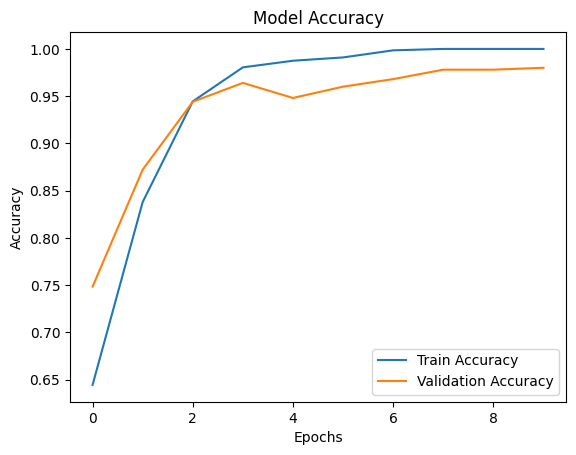

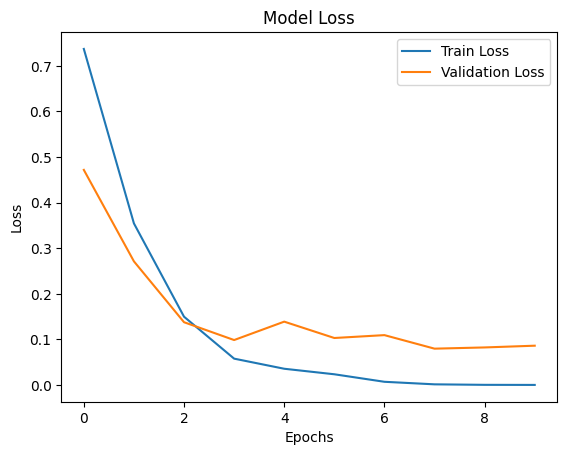

In [11]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluates the model's performance on test data and prints both the loss and accuracy.

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9776 - loss: 0.0907
Test Loss: 0.0863
Test Accuracy: 98.00%


# Displays a confusion matrix to assess "Normal" vs "Stroke" predictions.

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


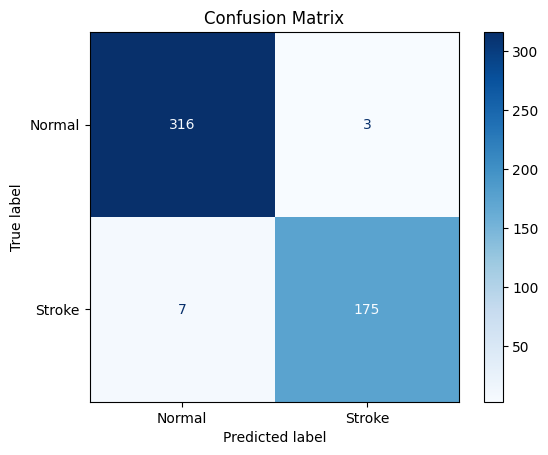

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Stroke"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Generates predictions for the test set and compares the first 10 predictions with their true labels.


In [14]:
# Predict on the test set
predictions = np.argmax(model.predict(X_test), axis=1)

# Compare predictions with true labels
print(predictions[:10])  # First 10 predictions
print(y_test[:10])       # True labels for the first 10 samples

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[0 0 1 0 0 0 1 0 1 0]
[0 0 1 0 0 0 1 0 1 0]


# Displays a confusion matrix for the first 10 test samples, visualizing "Normal" vs "Stroke" predictions.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step


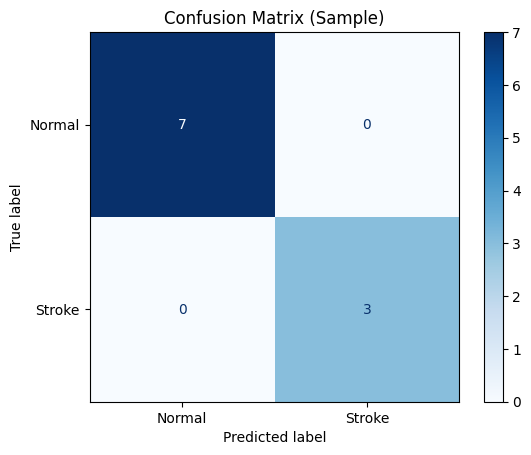

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test[:10], np.argmax(model.predict(X_test[:10]), axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Stroke"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Sample)')
plt.show()

# Converts the Keras model to TensorFlow Lite format and saves it as a .tflite file for lightweight deployment.

In [16]:
import numpy as np

# Predict on the test data
predictions = model.predict(X_test)  # Get raw probabilities for each class
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Compare predictions with true labels
print("Predicted Classes:", predicted_classes[:10])  # Show first 10 predictions
print("True Classes:", y_test[:10])  # Show first 10 true labels

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Classes: [0 0 1 0 0 0 1 0 1 0]
True Classes: [0 0 1 0 0 0 1 0 1 0]


# Prints a classification report and visualizes a confusion matrix for "Normal" vs "Stroke" predictions.

Classification Report:
               precision    recall  f1-score   support

      Normal       0.98      0.99      0.98       319
      Stroke       0.98      0.96      0.97       182

    accuracy                           0.98       501
   macro avg       0.98      0.98      0.98       501
weighted avg       0.98      0.98      0.98       501



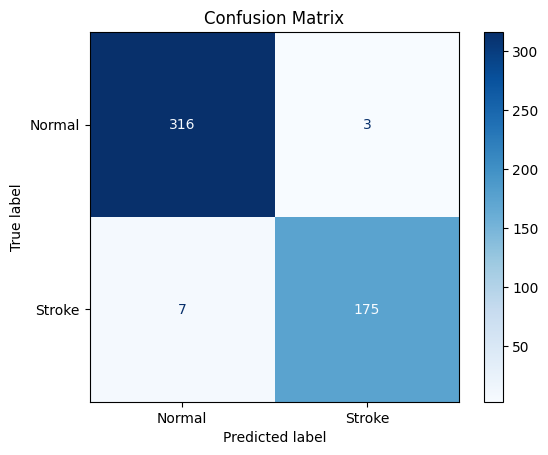

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Classification report
print("Classification Report:\n", classification_report(y_test, predicted_classes, target_names=["Normal", "Stroke"]))

# Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Stroke"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Selects a test image, predicts its class using the model, and prints whether it is "Normal" or "Stroke."

In [18]:
# Pick a sample image from the test set
sample_image = X_test[0]

# Predict for the single image
sample_prediction = model.predict(np.expand_dims(sample_image, axis=0))  # Add batch dimension
predicted_class = np.argmax(sample_prediction)

# Print the result
class_names = ["Normal", "Stroke"]
print(f"Predicted Class: {class_names[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
Predicted Class: Normal


# Creates a function to predict a single image's class and returns the result.

In [19]:
# Function to predict a single image's class
def predict_single_image(image, model, class_names):
    # Add a batch dimension to the image
    image = np.expand_dims(image, axis=0)  # Shape becomes (1, height, width, channels)
    
    # Predict the class
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)  # Get the index of the highest probability
    
    # Return the predicted class name
    return class_names[predicted_class]

# Define the class names
class_names = ["Normal", "Stroke"]

# Example usage with a test image
sample_image = X_test[1]  # Use a different image, e.g., index 1
predicted_label = predict_single_image(sample_image, model, class_names)

print(f"Predicted Class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class: Normal


# Compares the predicted label with the true label and prints whether it is "Normal" or "Stroke."

In [20]:
# Compare predicted label with true label
true_label = y_test[1]  # Assuming you used X_test[1]
print(f"True Class: {'Normal' if true_label == 0 else 'Stroke'}")

True Class: Normal


# The code selects and prints a mix of "Normal" and "Stroke" predictions from the test dataset.

In [21]:
# Iterate to find both "Normal" and "Stroke" samples
stroke_samples = []
normal_samples = []

for i in range(len(X_test)):
    true_label = y_test[i]
    predicted_label = class_names[np.argmax(model.predict(np.expand_dims(X_test[i], axis=0)))]
    true_class = class_names[true_label]

    if true_class == "Stroke" and len(stroke_samples) < 2:
        stroke_samples.append(f"Sample {i + 1}: True Class: {true_class}, Predicted Class: {predicted_label}")
    elif true_class == "Normal" and len(normal_samples) < 3:
        normal_samples.append(f"Sample {i + 1}: True Class: {true_class}, Predicted Class: {predicted_label}")
    
    if len(stroke_samples) + len(normal_samples) == 5:
        break

# Print selected samples
for sample in stroke_samples + normal_samples:
    print(sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Sample 3: True Class: Stroke, Predicted Class: Stroke
Sample 7: True Class: Stroke, Predicted Class: Stroke
Sample 1: True Class: Normal, Predicted Class: Normal
Sample 2: True Class: Normal, Predicted Class: Normal
Sample 4: True Class: Normal, Predicted Class: Normal


# Saves the model as `stroke_classification_model.h5`.

In [22]:
model.save('stroke_classification_model.h5')

In [112]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 62.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.7 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [113]:
pip show streamlit

Name: streamlit
Version: 1.44.0
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: altair, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, requests, tenacity, toml, tornado, typing-extensions, watchdog
Required-by: 
Note: you may need to restart the kernel to use updated packages.
